In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train_1 = pd.read_csv('ACT1_train_450.csv')

In [3]:
train_1.head(5)

,Unnamed: 0,D_212,D_213,D_214,D_215,D_216,D_217,D_219,D_294,D_295,...,D_7351,D_7352,D_7954,D_7955,D_7957,D_7958,D_8051,D_8053,D_8054,Act
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.0179
1,1,0,0,0,0,0,0,0,4,4,...,0,0,0,0,0,0,0,0,0,4.3003
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.2697
3,3,0,0,0,0,0,0,0,1,0,...,0,0,2,2,3,2,1,1,1,6.1797
4,4,0,0,0,0,0,0,0,0,0,...,2,0,0,2,0,1,0,0,1,4.3003


In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
y = train_1['Act'].values
train_1 = train_1.drop(['Act', 'Unnamed: 0'], axis = 1)
x = train_1.values
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)


In [5]:
print(np.shape(Y_train), np.shape(X_train), np.shape(Y_test), np.shape(X_test))
Y_train = np.reshape(Y_train,(len(Y_train),1))
Y_test = np.reshape(Y_test,(len(Y_test),1))


(22344,) (22344, 442) (7449,) (7449, 442)


In [6]:
def r_square(X, Y):
    """ r^2 value defined by the competition host, r^2 = 1 indicates 100% prediction accuracy
    """
    avx = np.mean(X)
    avy = np.mean(Y)
    sum1, sumx, sumy = 0, 0, 0
    for i in range(len(X)):
        sum1 += (X[i] - avx)*(Y[i] - avy)
        sumx += (X[i] - avx)*(X[i] - avx)
        sumy += (Y[i] - avy)*(Y[i] - avy)
    print(len(X), sum1, sumx, sumy)
    return sum1*sum1/(sumx*sumy)

In [7]:
from keras import backend as K
#Keras R_2 function
R_2 = []
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Using TensorFlow backend.


In [8]:
from sklearn.metrics import make_scorer
#Keras MAPE function
MAPE = []
def mean_ape(y_true, y_pred):
    return K.mean(K.abs((y_true-y_pred)/y_true))*100
#Scikit learn mape function
def mean_apes(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
mape_func = make_scorer(mean_apes)

In [9]:
from tensorflow.keras.models import Sequential
import keras
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [32]:
#Keras model
for epochs in [300]:
    for batch in [300]:
        K.clear_session()
        model = keras.models.Sequential();
        model.add(keras.layers.core.Dense(units = 50, activation='relu', input_dim = 442));
        model.add(keras.layers.core.Dense(units = 25, activation = 'relu'))
        model.add(keras.layers.core.Dense(1, activation = 'relu'));
        adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False);
        model.compile(loss="mean_squared_error", optimizer=adam, metrics = [coeff_determination, mean_ape,'mae']);
        print(model.summary(), 'Epochs = ', epochs, 'Batch =', batch);
        history = model.fit(X_train, Y_train, epochs = epochs, batch_size= batch, verbose = 1);
        #print(model.evaluate(X_val, Y_val,verbose=False)[1], )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                22150     
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 23,451
Trainable params: 23,451
Non-trainable params: 0
_________________________________________________________________
None Epochs =  300 Batch = 300
Epoch 1/300
22344/22344 [==============================] - 0s 16us/step - loss: 1.9211 - coeff_determination: -3.6139 - mean_ape: 21.0079 - mean_absolute_error: 0.9936
Epoch 2/300
22344/22344 [==============================] - 0s 10us/step - loss: 0.5562 - coeff_determination: -0.3596 - mean_ape: 11.8696 - mean_absolute_error: 0.5675
Epoch 3/300
22344/22344 [==========

22344/22344 [==============================] - 0s 8us/step - loss: 0.0922 - coeff_determination: 0.7745 - mean_ape: 4.5321 - mean_absolute_error: 0.2182
Epoch 94/300
22344/22344 [==============================] - 0s 9us/step - loss: 0.0926 - coeff_determination: 0.7738 - mean_ape: 4.5525 - mean_absolute_error: 0.2192: 0s - loss: 0.0943 - coeff_determination: 0.7710 - mean_ape: 4.6601 - mean_absolute_error: 
Epoch 95/300
22344/22344 [==============================] - 0s 8us/step - loss: 0.0897 - coeff_determination: 0.7802 - mean_ape: 4.4461 - mean_absolute_error: 0.2142
Epoch 96/300
22344/22344 [==============================] - 0s 9us/step - loss: 0.0895 - coeff_determination: 0.7809 - mean_ape: 4.4515 - mean_absolute_error: 0.2145
Epoch 97/300
22344/22344 [==============================] - 0s 8us/step - loss: 0.0926 - coeff_determination: 0.7734 - mean_ape: 4.5524 - mean_absolute_error: 0.2191
Epoch 98/300
22344/22344 [==============================] - 0s 9us/step - loss: 0.0936 - co

22344/22344 [==============================] - 0s 8us/step - loss: 0.0600 - coeff_determination: 0.8533 - mean_ape: 3.6243 - mean_absolute_error: 0.1738
Epoch 191/300
22344/22344 [==============================] - 0s 9us/step - loss: 0.0642 - coeff_determination: 0.8436 - mean_ape: 3.7749 - mean_absolute_error: 0.1810
Epoch 192/300
22344/22344 [==============================] - 0s 8us/step - loss: 0.0645 - coeff_determination: 0.8421 - mean_ape: 3.7865 - mean_absolute_error: 0.1816
Epoch 193/300
22344/22344 [==============================] - 0s 9us/step - loss: 0.0734 - coeff_determination: 0.8209 - mean_ape: 4.0407 - mean_absolute_error: 0.1940
Epoch 194/300
22344/22344 [==============================] - 0s 8us/step - loss: 0.0634 - coeff_determination: 0.8443 - mean_ape: 3.7344 - mean_absolute_error: 0.1792
Epoch 195/300
22344/22344 [==============================] - 0s 9us/step - loss: 0.0653 - coeff_determination: 0.8390 - mean_ape: 3.8162 - mean_absolute_error: 0.1831
Epoch 196/30

22344/22344 [==============================] - 0s 8us/step - loss: 0.0501 - coeff_determination: 0.8762 - mean_ape: 3.3198 - mean_absolute_error: 0.1590
Epoch 288/300
22344/22344 [==============================] - 0s 8us/step - loss: 0.0492 - coeff_determination: 0.8783 - mean_ape: 3.2795 - mean_absolute_error: 0.1570
Epoch 289/300
22344/22344 [==============================] - 0s 8us/step - loss: 0.0478 - coeff_determination: 0.8829 - mean_ape: 3.2371 - mean_absolute_error: 0.1548
Epoch 290/300
22344/22344 [==============================] - 0s 8us/step - loss: 0.0466 - coeff_determination: 0.8851 - mean_ape: 3.1963 - mean_absolute_error: 0.1528
Epoch 291/300
22344/22344 [==============================] - 0s 8us/step - loss: 0.0500 - coeff_determination: 0.8761 - mean_ape: 3.3485 - mean_absolute_error: 0.1600
Epoch 292/300
22344/22344 [==============================] - 0s 8us/step - loss: 0.0492 - coeff_determination: 0.8805 - mean_ape: 3.3197 - mean_absolute_error: 0.1586
Epoch 293/30

In [33]:
print(history.history.keys())

dict_keys(['loss', 'coeff_determination', 'mean_ape', 'mean_absolute_error'])


In [34]:
print(model.evaluate(X_test, Y_test,verbose=False))

[0.22289228549769305, 0.3492440442393597, 6.709387163598606, 0.3245119083068553]
[0.23685935425716753, 0.31293874812583855, 6.883607272766375, 0.3320170035496992]


In [35]:
Y_predict = model.predict(X_test)

6.883608294490763

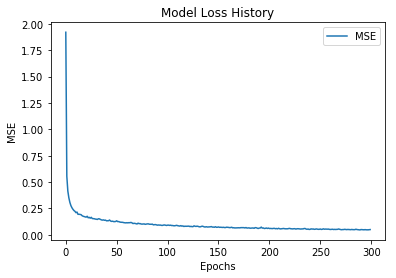

In [38]:
plt.plot(history.history['loss'])
#plt.plot(history.history['mean_ape'])
plt.title('Model Loss History')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['MSE'])


In [39]:
history.history['loss']

[1.9210699229120056,
 0.5561644206529786,
 0.41549945612278966,
 0.3516419552962839,
 0.30760490821492403,
 0.2776350429487664,
 0.2575177351847115,
 0.24239797812559422,
 0.23046797189849533,
 0.22285758411045617,
 0.2101960689245566,
 0.21595456945748898,
 0.19445313989443885,
 0.19518658861309834,
 0.19294927767793038,
 0.19131387459668386,
 0.18148566163860252,
 0.17650779014579335,
 0.173492305220838,
 0.16992692377670368,
 0.16742251851825019,
 0.175986222114522,
 0.16165673162159935,
 0.1658630882911024,
 0.1580341876545475,
 0.16622222040476783,
 0.15444643899926438,
 0.1538304715476346,
 0.15249123524326258,
 0.1493573099230721,
 0.1484038860774194,
 0.14575278645763465,
 0.152298682234245,
 0.15137295320902167,
 0.14589044080785085,
 0.14153423409600904,
 0.13970505308147788,
 0.14153331908308345,
 0.1380171691668725,
 0.13931272904739728,
 0.13301730434441283,
 0.13319866256798377,
 0.13399432900848884,
 0.14041957412831382,
 0.13097633248961318,
 0.12754144646811563,
 0.129

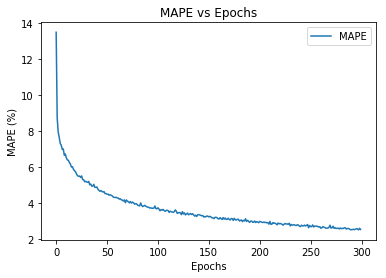

In [24]:
plt.plot(history.history['mean_ape'])
#plt.plot(history.history['mean_ape'])
plt.title('MAPE vs Epochs')
plt.ylabel('MAPE (%)')
plt.xlabel('Epochs')
plt.legend(['MAPE'])


6.869175680982705


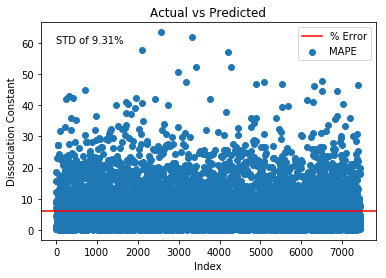

In [28]:
comparison = np.ravel(np.abs((Y_predict-Y_test)/Y_test*100))
abs_comparison = np.abs(comparison)
mask = np.where(abs_comparison>0)
plt.scatter(range(np.shape(mask)[1]), comparison[mask])
plt.axhline(y=mean_apes(Y_predict,Y_test), color='r', linestyle='-')
plt.title('Actual vs Predicted')
plt.ylabel('Dissociation Constant')
plt.xlabel('Index')
plt.legend(['% Error', 'MAPE'])
plt.text(0.05, 60, 'STD of 9.31%')
print(comparison.std())

Text(30, 3000, 'STD of 6.87%')

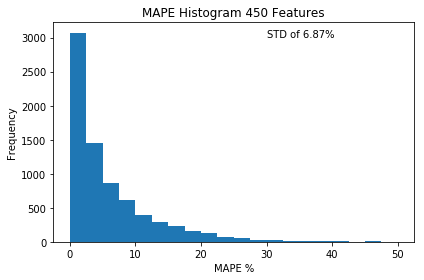

In [40]:
fig, ax= plt.subplots(1, 1,tight_layout=True)
ax.hist(comparison,np.linspace(0,50,21))
ax.set_xlabel('MAPE %')
ax.set_ylabel('Frequency')
ax.set_title('MAPE Histogram 450 Features')
plt.text(30, 3000, 'STD of 6.87%')

In [27]:
exportdata = pd.DataFrame()
exportdata['loss_anova'] = history.history['loss']
exportdata['mean_ape'] = history.history['mean_ape']
exportdata['mean_absolute_error'] = history.history['mean_absolute_error']
exportdata['coeff_determination'] = history.history['coeff_determination']
exportdata.to_csv('450_data_plots.csv')


